In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
import statistics as st
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
#import ordinal_model

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')
dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
del dataset['track_id']
del dataset['track_name']
del dataset['artists']
del dataset['album_name']
del dataset['Unnamed: 0']
dataset.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
bins = [0,20,40,60,80,100]
dataset['popularity'] = pd.cut(dataset['popularity'], bins=bins)
dataset.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,"(60, 80]",230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,"(40, 60]",149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,"(40, 60]",210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,"(60, 80]",201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,"(80, 100]",198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
le = preprocessing.LabelEncoder()
#dataset['explicit']=le.fit_transform(dataset['explicit'])
dataset['popularity']=le.fit_transform(dataset['popularity'])
dataset['track_genre']=le.fit_transform(dataset['track_genre'])


In [ ]:
dataset.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,3,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,2,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,91200.0,1.937818,1.529120,0.000,1.0000,2.000000,3.0000,5.000
duration_ms,91200.0,228024.238520,105874.709355,8586.000,174146.0000,213066.000000,261698.5000,5237295.000
danceability,91200.0,0.566730,0.173493,0.000,0.4560,0.580000,0.6940,0.985
energy,91200.0,0.641613,0.251434,0.000,0.4720,0.685000,0.8540,1.000
key,91200.0,5.312160,3.560389,0.000,2.0000,5.000000,8.0000,11.000
loudness,91200.0,-8.254745,5.028311,-49.531,-10.0060,-7.004000,-5.0030,4.532
mode,91200.0,0.637325,0.480775,0.000,0.0000,1.000000,1.0000,1.000
speechiness,91200.0,0.084768,0.105889,0.000,0.0359,0.048900,0.0846,0.963
acousticness,91200.0,0.315107,0.332541,0.000,0.0168,0.169000,0.5980,0.996
instrumentalness,91200.0,0.156548,0.310016,0.000,0.0000,0.000041,0.0496,1.000


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('popularity')
test_labels = test_features.pop('popularity')

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

In [ ]:
def model_builder(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001), batch_size = 512),
      layers.Dropout(0.5),
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001), batch_size = 512),
      layers.Dropout(0.5),
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001), batch_size = 512),
      layers.Dropout(0.5),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
  return model

In [ ]:
def get_callbacks():
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

model = model_builder(normalizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               6144      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 2048)              2099200   
                                                        

In [ ]:
hist = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=10,
    callbacks=get_callbacks(),
     use_multiprocessing=True
    )


Epoch 1/10
 167/2280 [=>............................] - ETA: 2:02 - loss: 1.4139 - accuracy: 0.2917

KeyboardInterrupt: ignored

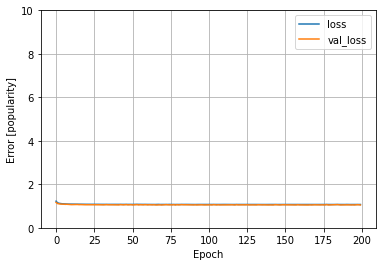

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [popularity]')
  plt.legend()
  plt.grid(True)

plot_loss(hist)

In [ ]:
testresult={}
testresult['model'] = model.evaluate(test_features, test_labels, verbose=0)
print("Mean absolute error: ", testresult['model'][0])
print("Accuracy: ", testresult['model'][1])

Mean absolute error:  1.0429573059082031
Accuracy:  0.3074122667312622


713/713 [==============================] - 1s 2ms/step


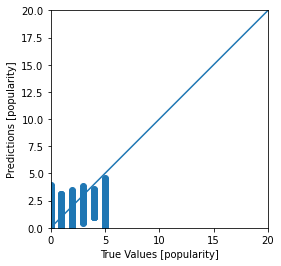

In [ ]:
test_predictions = model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [popularity]')
plt.ylabel('Predictions [popularity]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
